In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
import os
if not os.path.exists('./task2-output/task2-images'):
    os.makedirs('./task2-output/task2-images')

In [3]:
df = pd.read_csv('df.csv')

for var_name in df.columns:
    if 'low' in var_name or 'high' in var_name:
        print(var_name, 'yes')
        df = df.drop(var_name, axis=1)

Temperature (low) indoor yes
Temperature (high) indoor yes
Temperature (low) outside yes
Temperature (high) outside yes


In [4]:
# month and season for each row
df['Month'] = pd.DatetimeIndex(df['DateTime']).month

season_list = ['Spring', 'Summer', 'Autumn', 'Winter']
season_dic = {12:'Winter', 1:'Winter', 2:'Winter', 
              3:'Spring', 4:'Spring', 5:'Spring',
              6:'Summer', 7:'Summer', 8:'Summer', 
              9:'Autumn', 10:'Autumn', 11:'Autumn'}
df['Season'] = df['Month'].map(season_dic)

In [5]:
df

,DateTime,Barometer,Humidity indoor,Temperature indoor,Temperature outside,Rainfall,Month,Season
0,2016-10-09,1021.9,54.0,21.93000,10.66000,0.0,10,Autumn
1,2016-10-10,1019.9,52.0,21.77000,8.94000,0.0,10,Autumn
2,2016-10-11,1015.8,51.0,21.36000,8.69000,0.0,10,Autumn
3,2016-10-12,1013.2,51.0,21.44000,11.55000,0.0,10,Autumn
4,2016-10-13,1005.9,52.0,21.22000,9.40000,0.0,10,Autumn
...,...,...,...,...,...,...,...,...
347,2017-10-05,1010.6,56.0,21.34000,13.32000,1.0,10,Autumn
348,2017-10-06,1019.2,54.0,21.34000,11.58000,0.0,10,Autumn
349,2017-10-07,1011.5,55.0,21.34000,13.70000,1.1,10,Autumn
350,2017-10-08,1013.1,55.0,21.81000,13.60000,0.0,10,Autumn


In [19]:
df.groupby('Season').describe()

Barometer                                                             \
           count         mean        std    min      25%      50%       75%   
Season                                                                        
Autumn      92.0  1008.953261  10.280671  979.6  1003.05  1010.35  1015.400   
Spring      90.0  1010.240000   9.850099  980.8  1005.35  1011.90  1015.725   
Summer      82.0  1007.228049   6.126491  989.9  1003.50  1008.40  1010.975   
Winter      88.0  1013.444318  11.348714  980.9  1008.75  1016.40  1019.825   

               Humidity indoor             ... Rainfall       Month  \
           max           count       mean  ...      75%   max count   
Season                                     ...                        
Autumn  1027.1            92.0  52.021739  ...      2.2  23.2  92.0   
Spring  1028.6            90.0  44.988889  ...      1.0  16.9  90.0   
Summer  1019.9            82.0  53.548780  ...      3.1  19.0  82.0   
Winter  1035.6            88.0  43.806818  ...      1.0  17.9  88.0   

                                                         
             mean       std  min  25%   50%   75%   max  
Season                                                   
Autumn  10.000000  0.811998  9.0  9.0  10.0  11.0  11.0  
Spring   4.000000  0.821071  3.0  3.0   4.0   5.0   5.0  
Summer   6.902439  0.795198  6.0  6.0   7.0   8.0   8.0  
Winter   4.943182  4.992772  1.0  1.0   2.0  12.0  12.0  

[4 rows x 48 columns]

In [40]:
df.groupby('Season').describe()[data_type][['min', 'max']].loc[season_list]

,min,max
Season,,
Spring,19.67,26.78
Summer,21.77,29.21
Autumn,18.11,23.26
Winter,18.04,23.57


In [45]:
df.groupby('Season').describe()[data_type]['min'].loc[season_list]

Season
Spring    19.67
Summer    21.77
Autumn    18.11
Winter    18.04
Name: min, dtype: float64

In [6]:
# func that creates filename for images
def create_filename(when, var_name, data_type, plot_type):
    return str(when + '-' + var_name + '-' + data_type + '-' + plot_type + '.png')

create_filename('season', 'precipitation', 'std', 'scatter')

'season-precipitation-std-scatter.png'

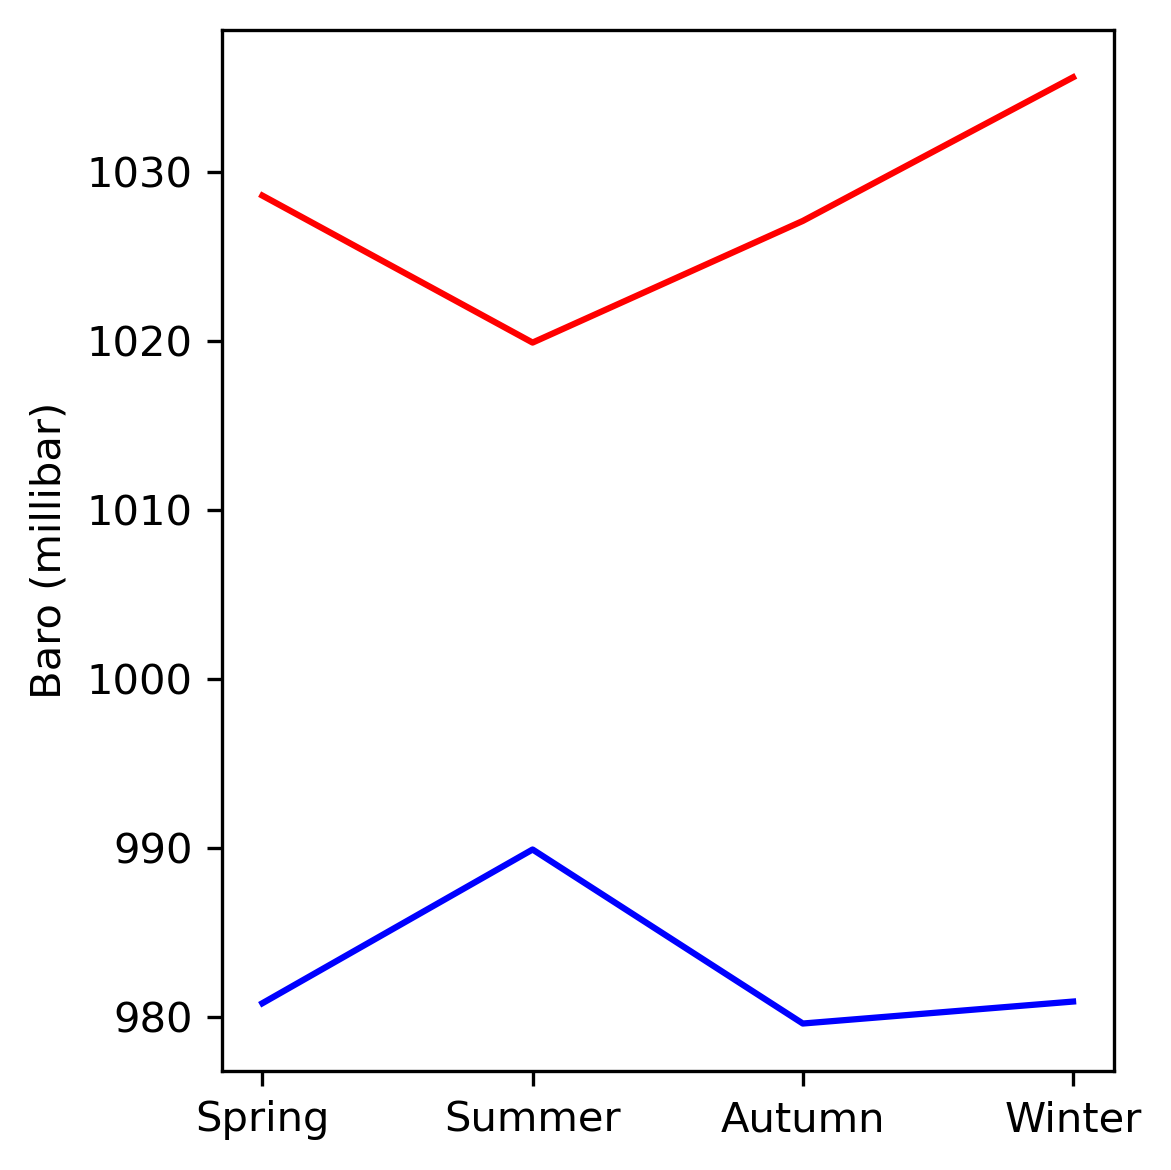

In [10]:
# create seasonal min and max plots
# where to save image files
file_path = './task2-output/task2-images/'




# BAROMETER
data_type = 'Barometer'
# using plt.plot
plt.figure(dpi=300, figsize=[4,4])
plt.plot(season_list, df.groupby('Season').describe()[data_type]['min'].loc[season_list], c='blue')
plt.plot(season_list, df.groupby('Season').describe()[data_type]['max'].loc[season_list], c='red')
plt.ylabel('Baro (millibar)')
plt.tight_layout()

filename = str(file_path + create_filename('season', 'barometer', 'max', 'line'))
plt.savefig(filename)
plt.show()


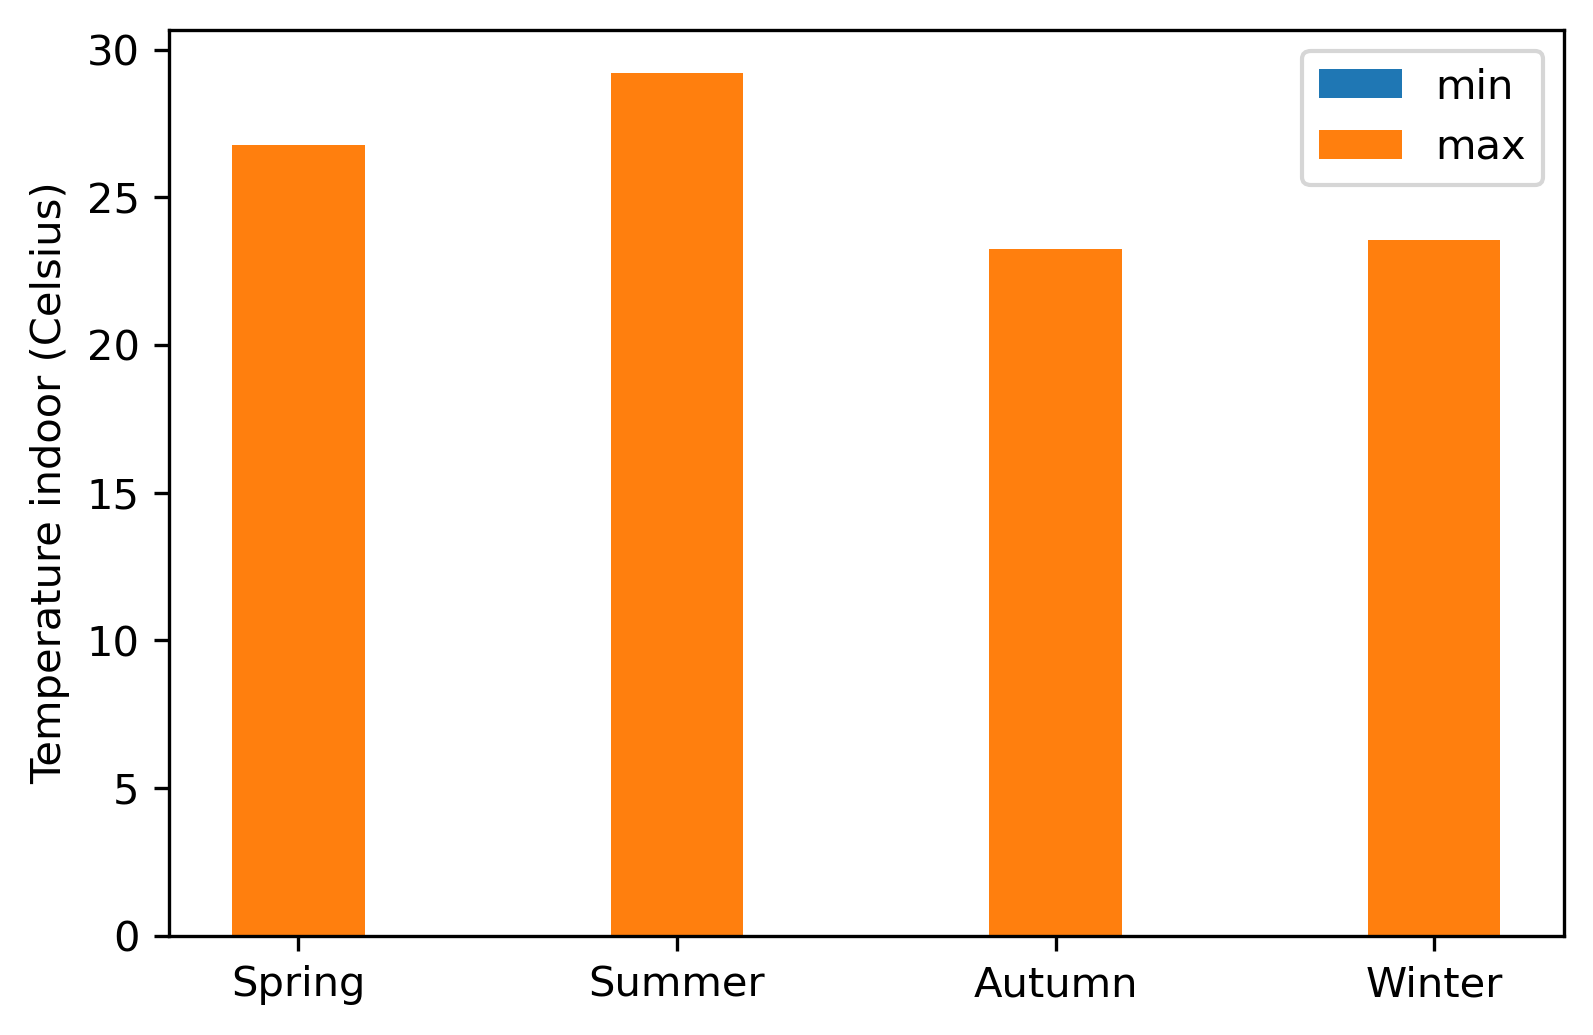

In [66]:
# TEMPERATURE INDOOR BAR MINMAX
data_type = 'Temperature indoor'
# using plt.bar
# plt.figure(dpi=300, figsize=[6,4])
# plt.bar(season_list, df.groupby('Season').describe()[data_type]['min'].loc[season_list], color='blue')
# plt.bar(season_list, df.groupby('Season').describe()[data_type]['max'].loc[season_list], color='red')
# plt.ylabel('Temperature indoor (Celsius)')
# plt.tight_layout()

width = 0.35

fig, ax = plt.subplots(dpi=300, figsize=[6,4])
rects1 = ax.bar(season_list, df.groupby('Season').describe()[data_type]['min'].loc[season_list], width, label='min')
rects2 = ax.bar(season_list, df.groupby('Season').describe()[data_type]['max'].loc[season_list], width, label='max')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Temperature indoor (Celsius)')
# ax.set_xticks(season_list)
# ax.set_xticklabels(labels)
ax.legend()

filename = str(file_path + create_filename('season', 'temperature-indoor', 'minmax', 'bar'))
# plt.savefig(filename)
plt.show()

In [78]:
# TEMPERATURE INDOOR BAR MINMAX
data_type = 'Temperature indoor'

fig = px.bar(df.groupby('Season').describe()[data_type][['min', 'max']].loc[season_list], barmode='group',
            width=400, height=400)
fig.update_layout(plot_bgcolor='rgba(0, 0, 0, 0)', 
                  paper_bgcolor='rgba(0, 0, 0, 0)')
fig.update_xaxes(title_text=None, # tickmode='linear' shows all the months
                 showline=True, linewidth=1, linecolor='black')
fig.update_yaxes(title_text='Temperature indoor (Celsius)', range=[16,30],
                showline=True, linewidth=1, linecolor='black')

filename = str(file_path + create_filename('season', 'temperature-indoor', 'minmax', 'bar'))
print(filename)

fig.show()

./task2-output/task2-images/season-temperature-indoor-minmax-bar.png


In [79]:
# TEMPERATURE OUTSIDE BAR MINMAX
# TEMPERATURE INDOOR BAR MINMAX
data_type = 'Temperature outside'

fig = px.bar(df.groupby('Season').describe()[data_type][['min', 'max']].loc[season_list], barmode='group',
            width=400, height=400)
fig.update_layout(plot_bgcolor='rgba(0, 0, 0, 0)', 
                  paper_bgcolor='rgba(0, 0, 0, 0)')
fig.update_xaxes(title_text=None, # tickmode='linear' shows all the months
                 showline=True, linewidth=1, linecolor='black')
fig.update_yaxes(title_text='Temperature outside (Celsius)', 
#                  range=[16,30],
                showline=True, linewidth=1, linecolor='black')

filename = str(file_path + create_filename('season', 'temperature-outside', 'minmax', 'bar'))
print(filename)

fig.show()


./task2-output/task2-images/season-temperature-outside-minmax-bar.png


In [88]:
# PRECIPITATION BAR MAX
data_type = 'Rainfall'

fig = px.bar(df.groupby('Season').describe()[data_type]['max'].loc[season_list],
            width=400, height=400)
fig.update_layout(plot_bgcolor='rgba(0, 0, 0, 0)', 
                  paper_bgcolor='rgba(0, 0, 0, 0)')
fig.update_xaxes(title_text=None, # tickmode='linear' shows all the months
                 showline=True, linewidth=1, linecolor='black')
fig.update_yaxes(title_text='Precipitation (mm)', 
#                  range=[16,30],
                showline=True, linewidth=1, linecolor='black')
# fig.update_traces(marker_color='red')

filename = str(file_path + create_filename('season', 'precipitation', 'minmax', 'bar'))
print(filename)

fig.show()


./task2-output/task2-images/season-precipitation-minmax-bar.png


./task2-output/task2-images/season-humidity-minmax-line.png


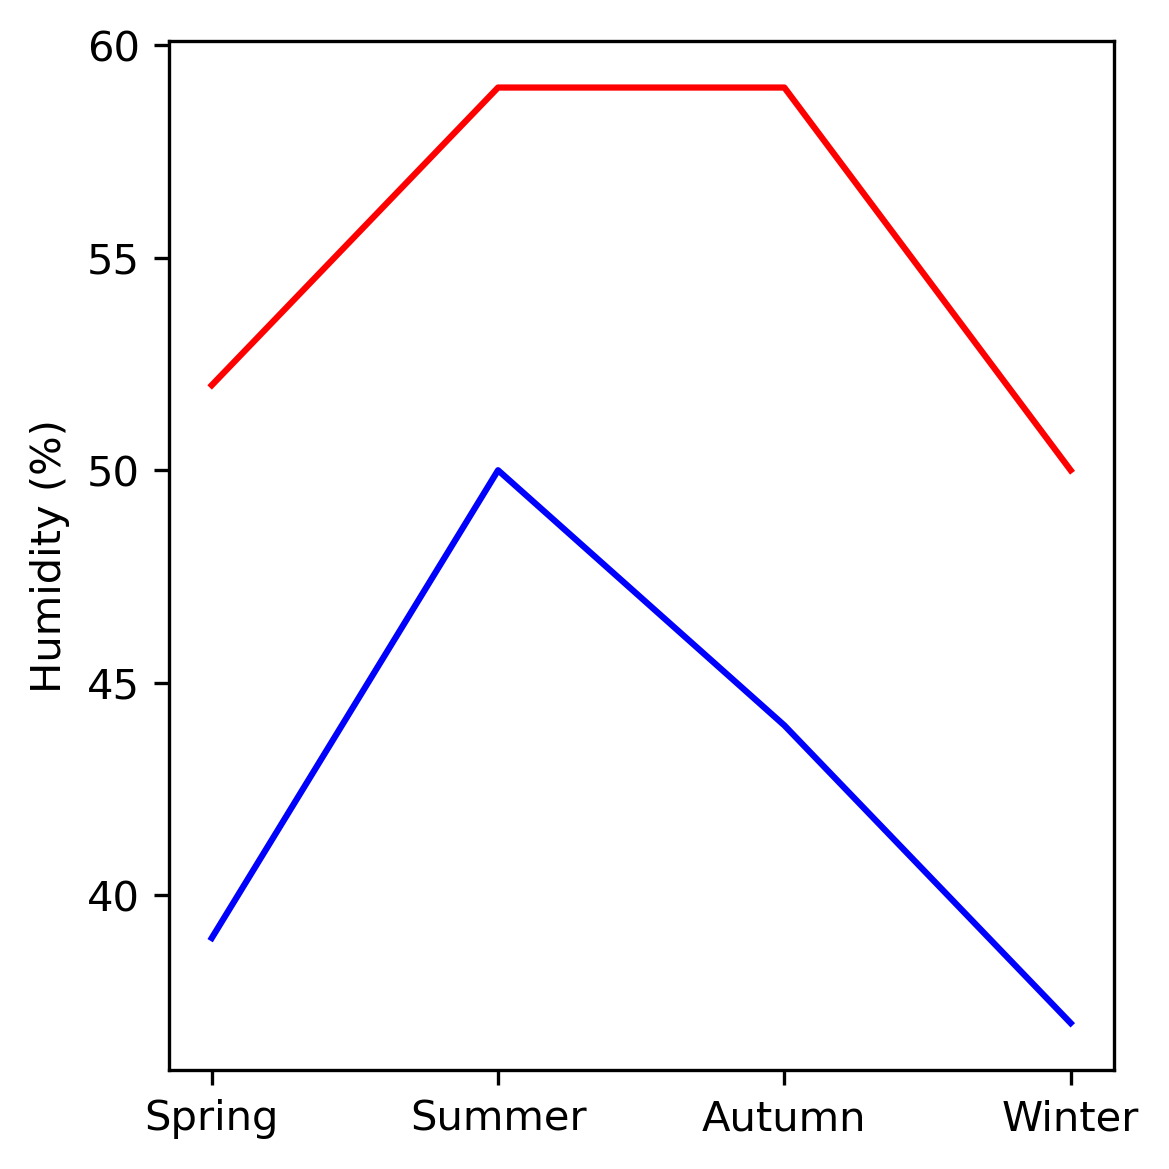

In [9]:
# SEASON HUMIDITY INDOOR MINMAX LINE

# where to save image files
file_path = './task2-output/task2-images/'


data_type = 'Humidity indoor'
# using plt.plot
plt.figure(dpi=300, figsize=[4,4])
plt.plot(season_list, df.groupby('Season').describe()[data_type]['min'].loc[season_list], c='blue')
plt.plot(season_list, df.groupby('Season').describe()[data_type]['max'].loc[season_list], c='red')
plt.ylabel('Humidity (%)')
plt.tight_layout()

filename = str(file_path + create_filename('season', 'humidity', 'minmax', 'line'))
print(filename)
plt.savefig(filename)
plt.show()

Index(['Barometer', 'Humidity indoor', 'Temperature indoor',
       'Temperature outside', 'Rainfall'],
      dtype='object')


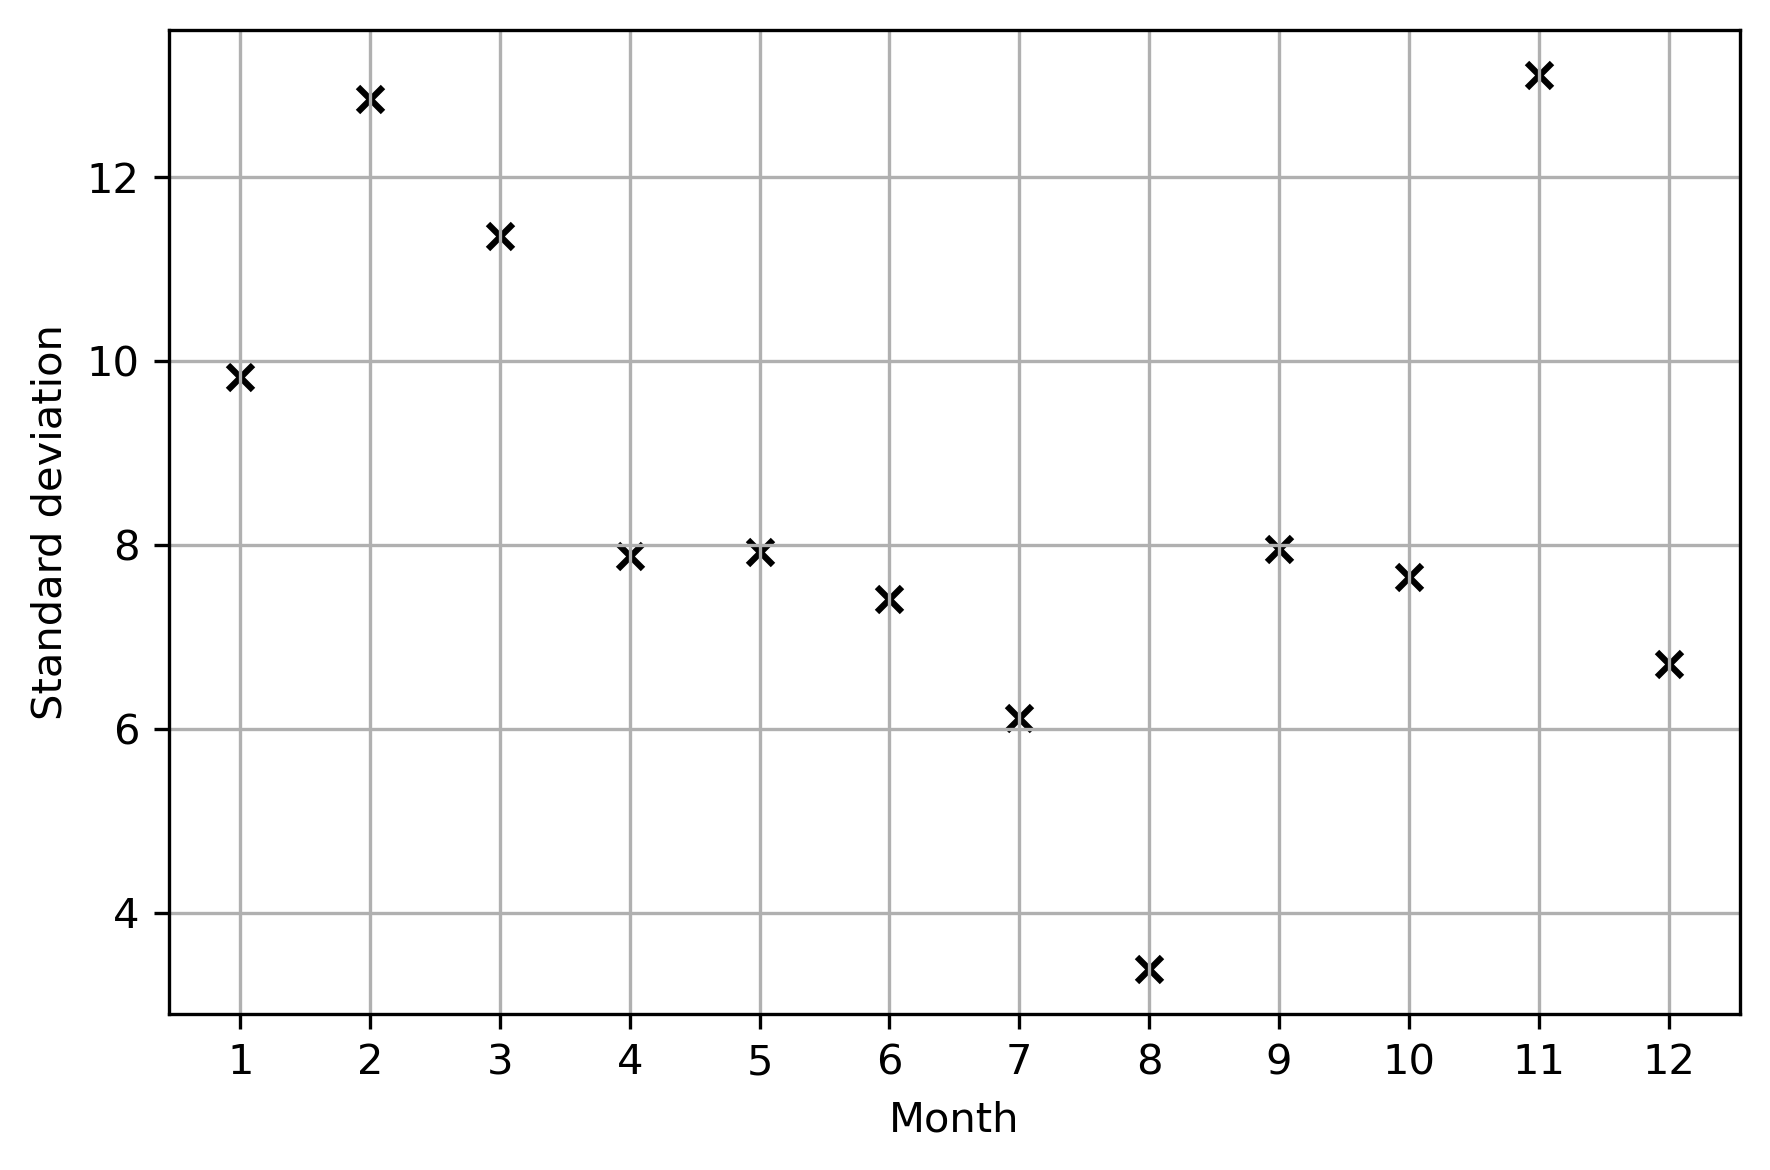

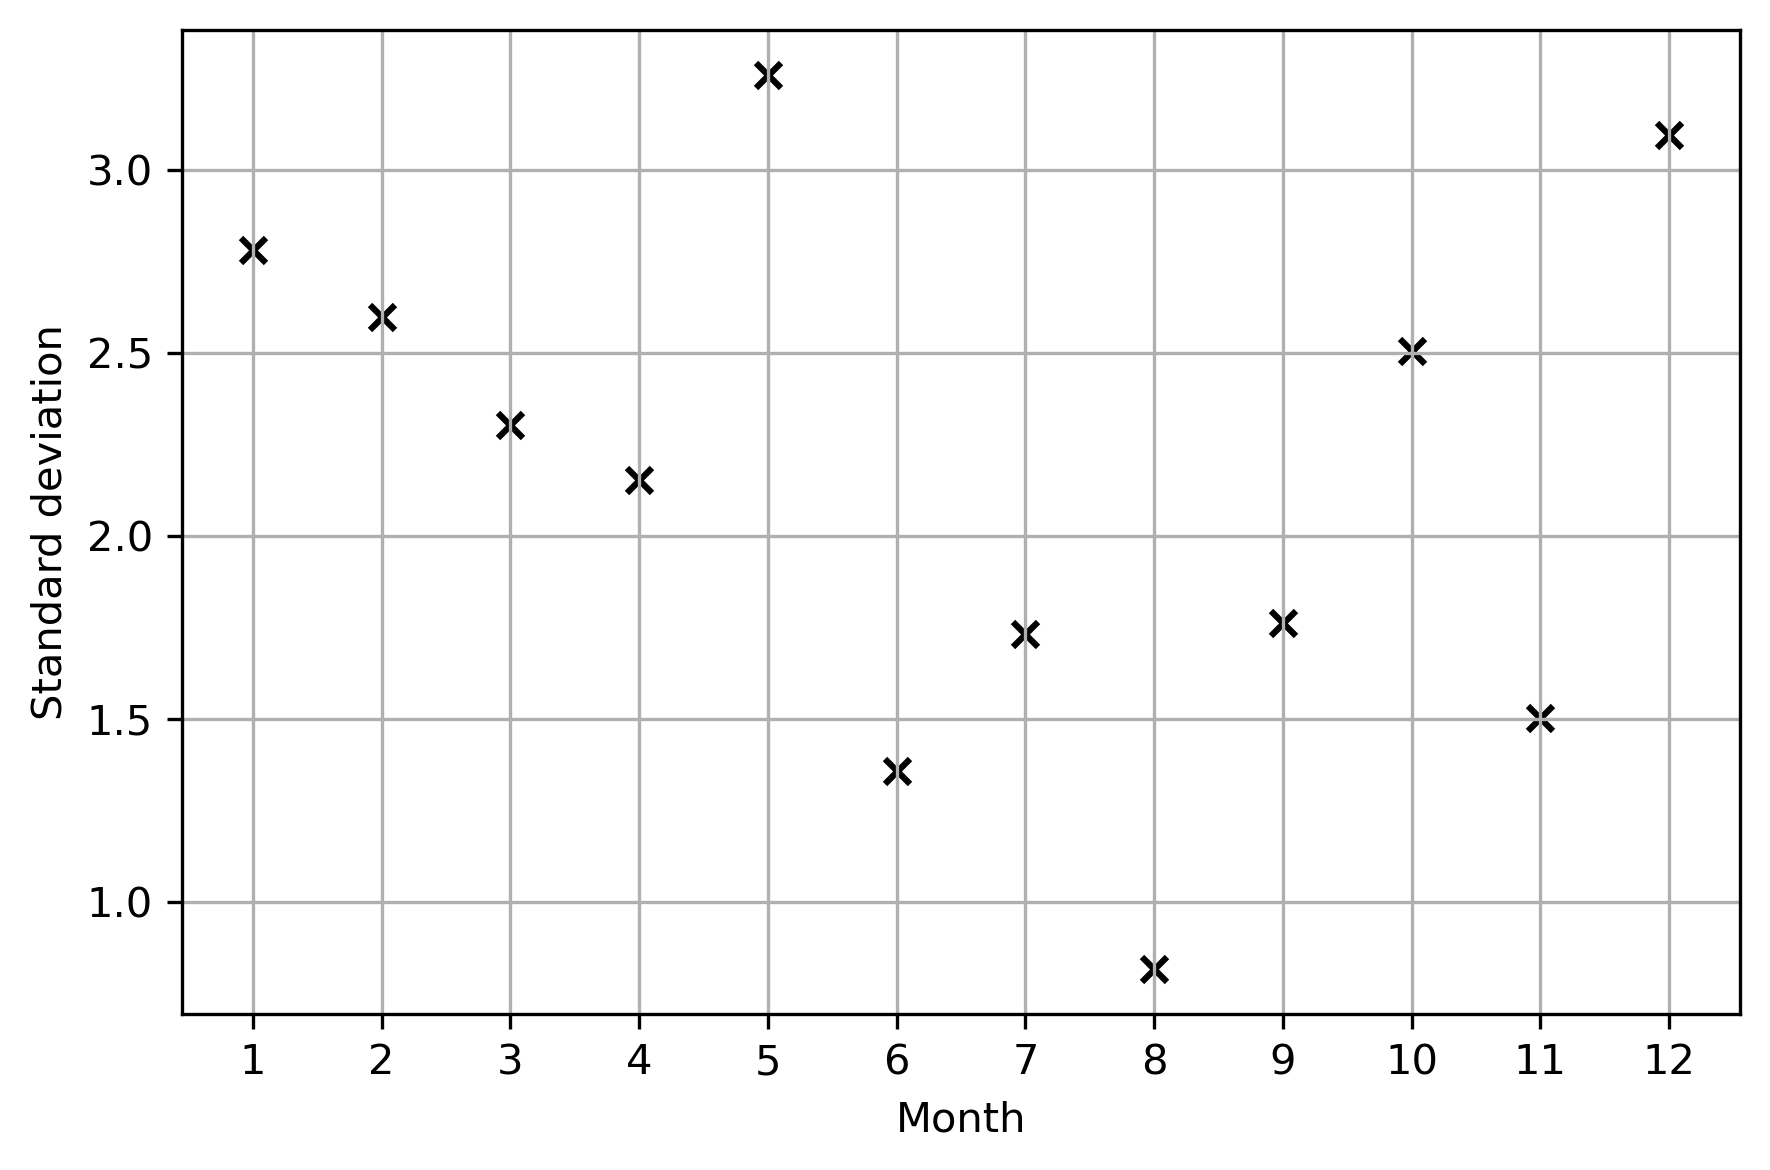

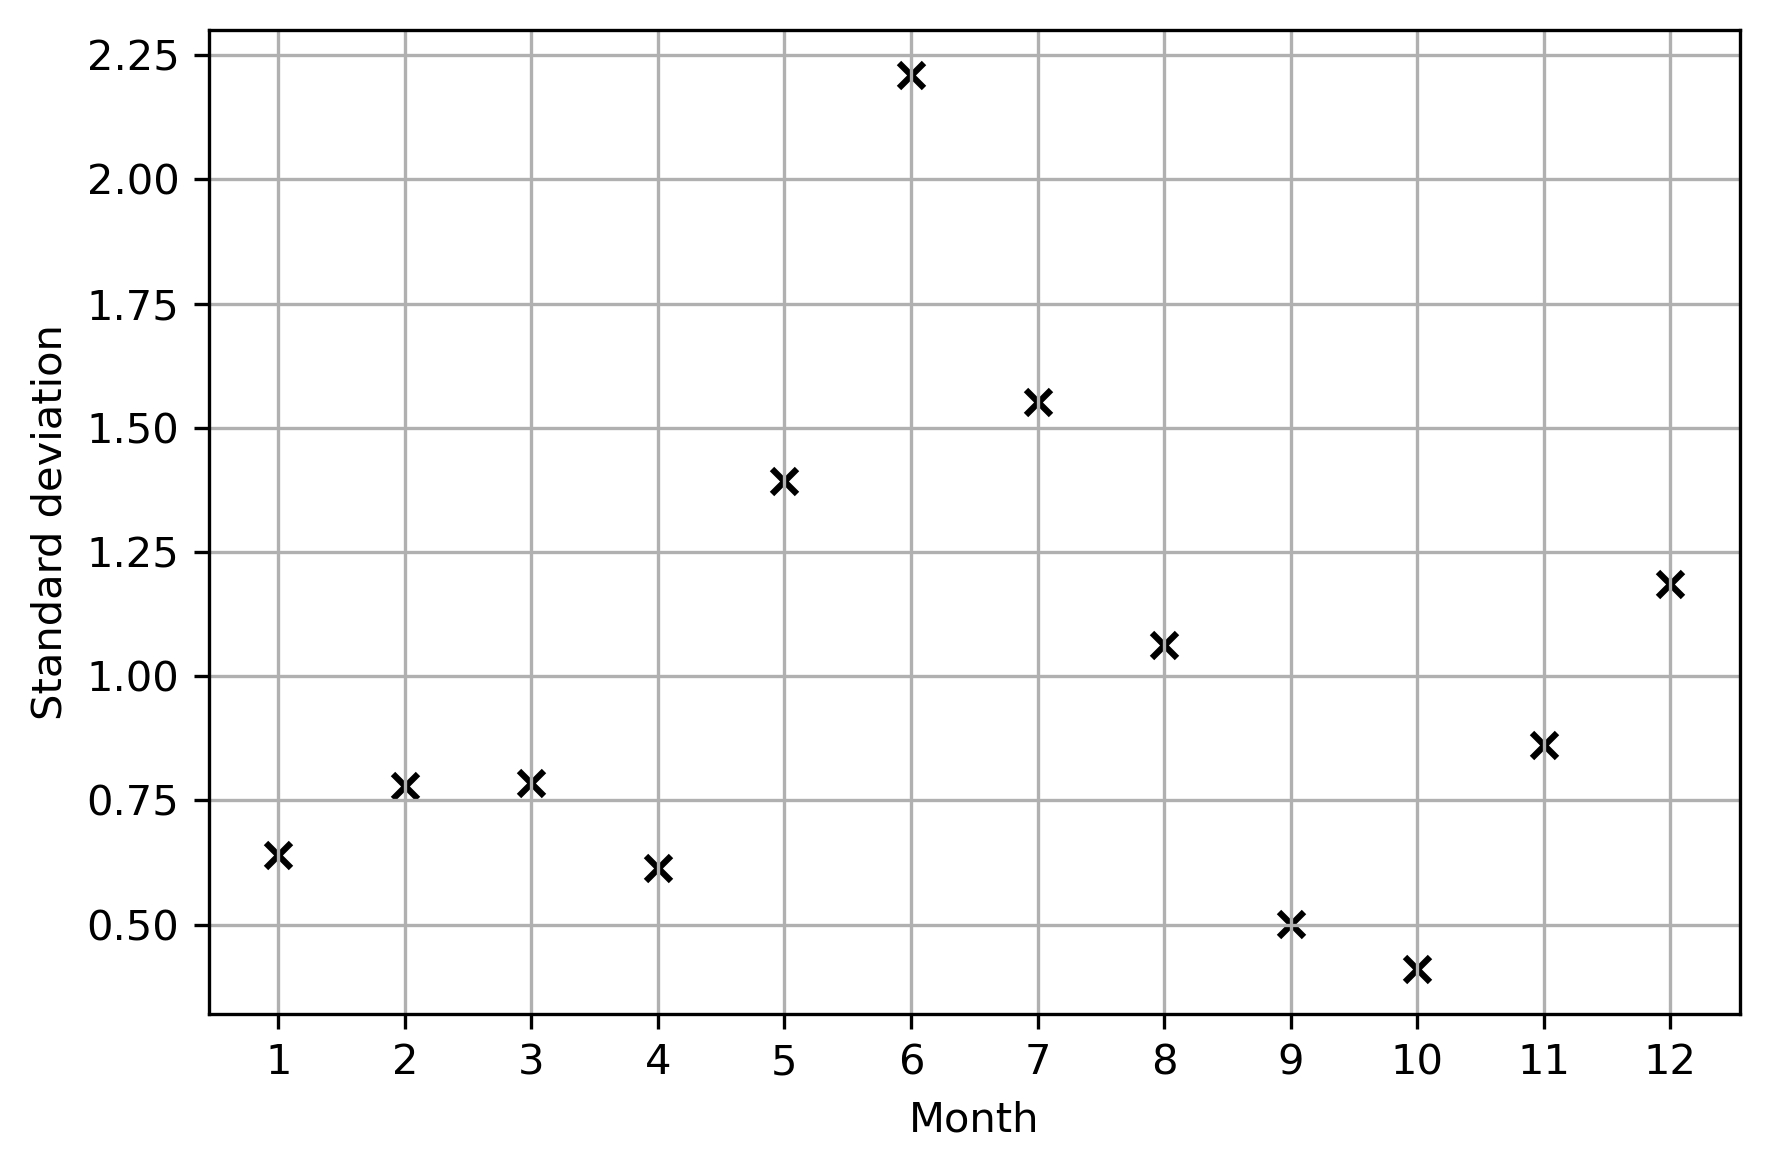

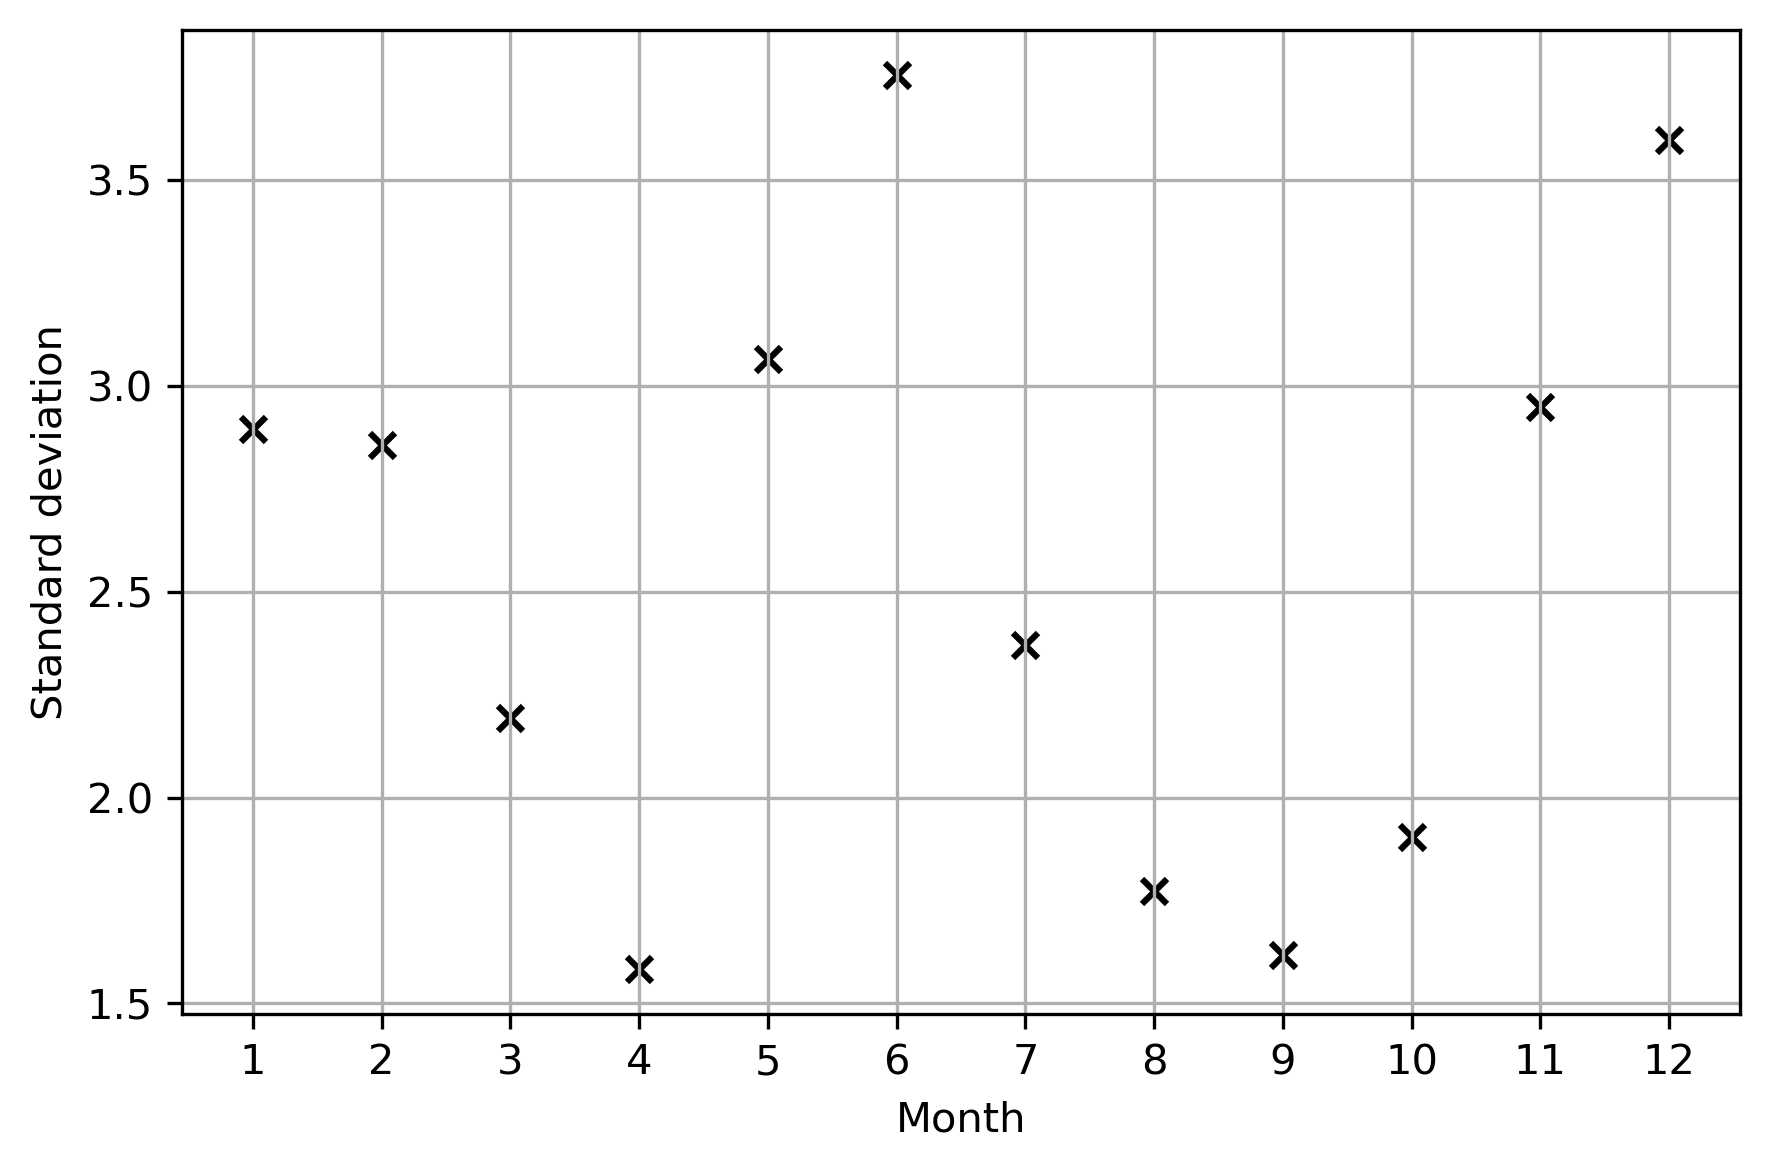

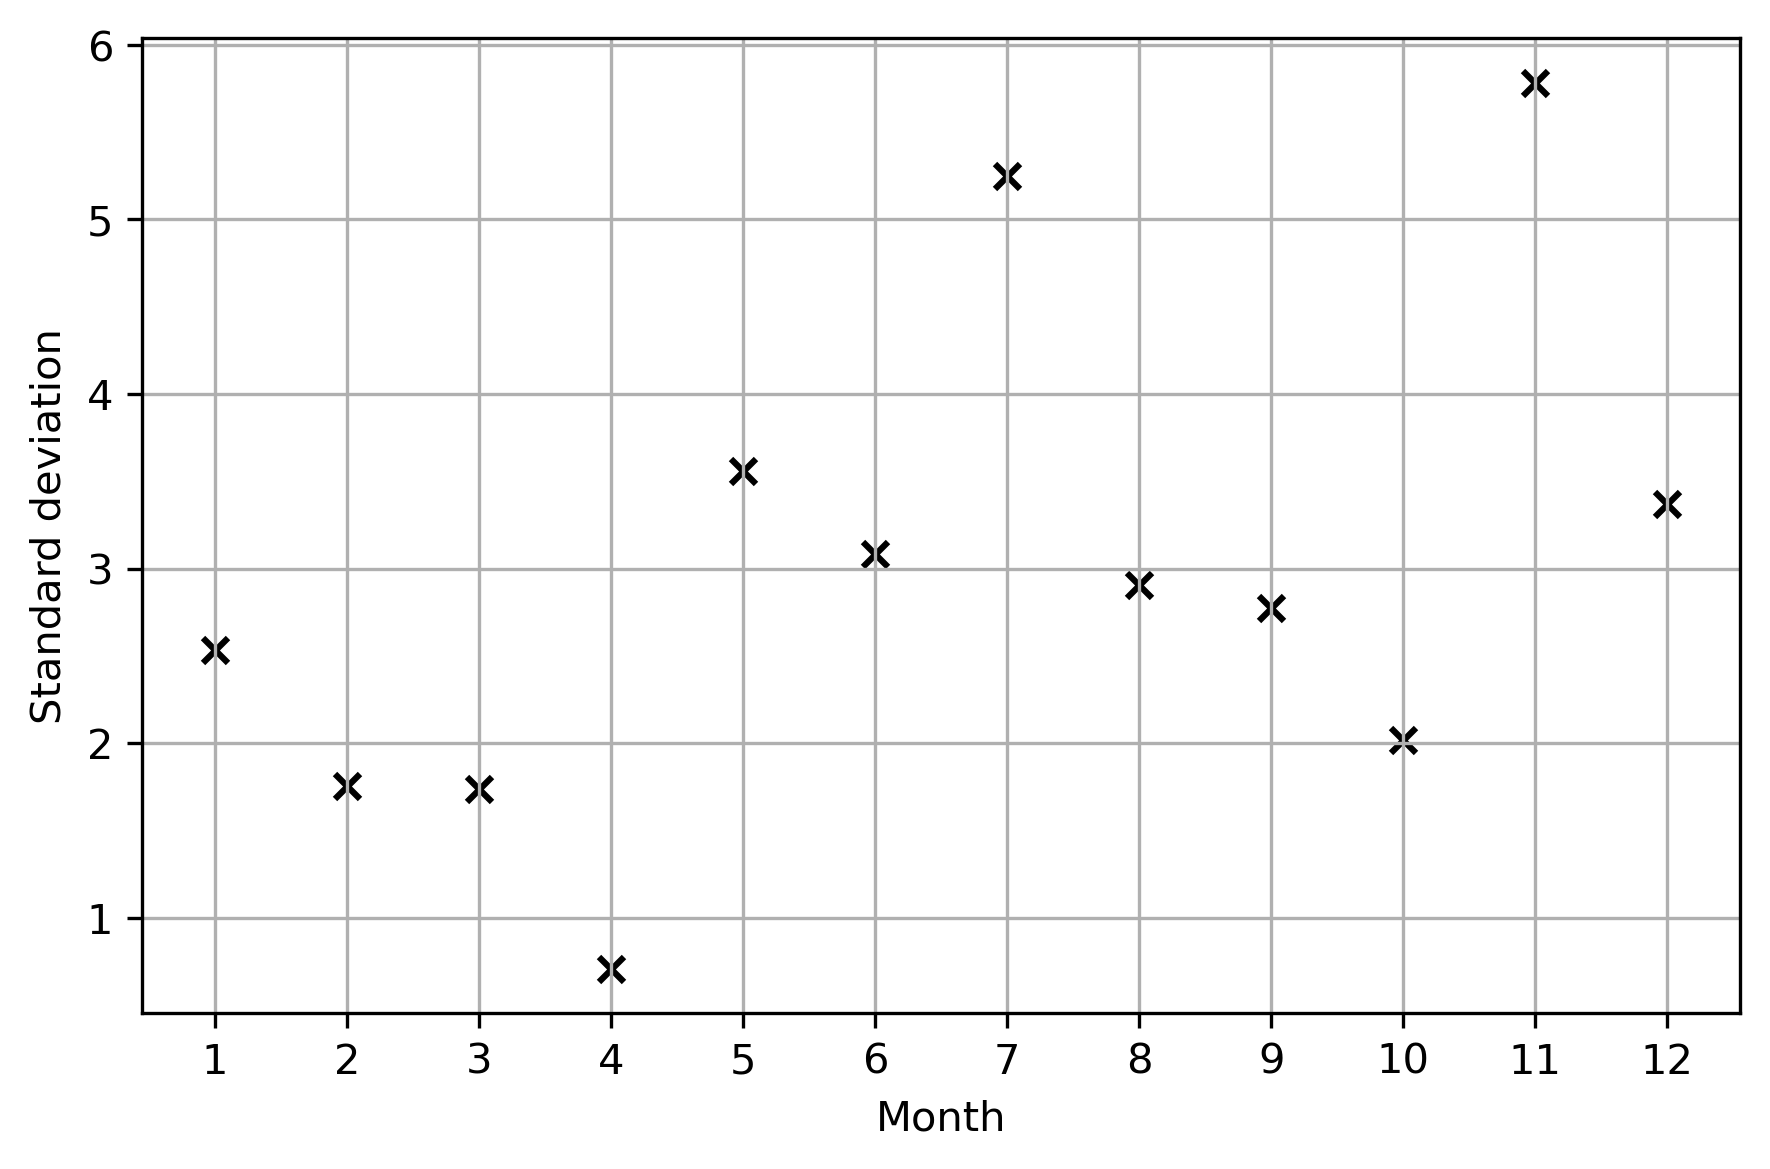

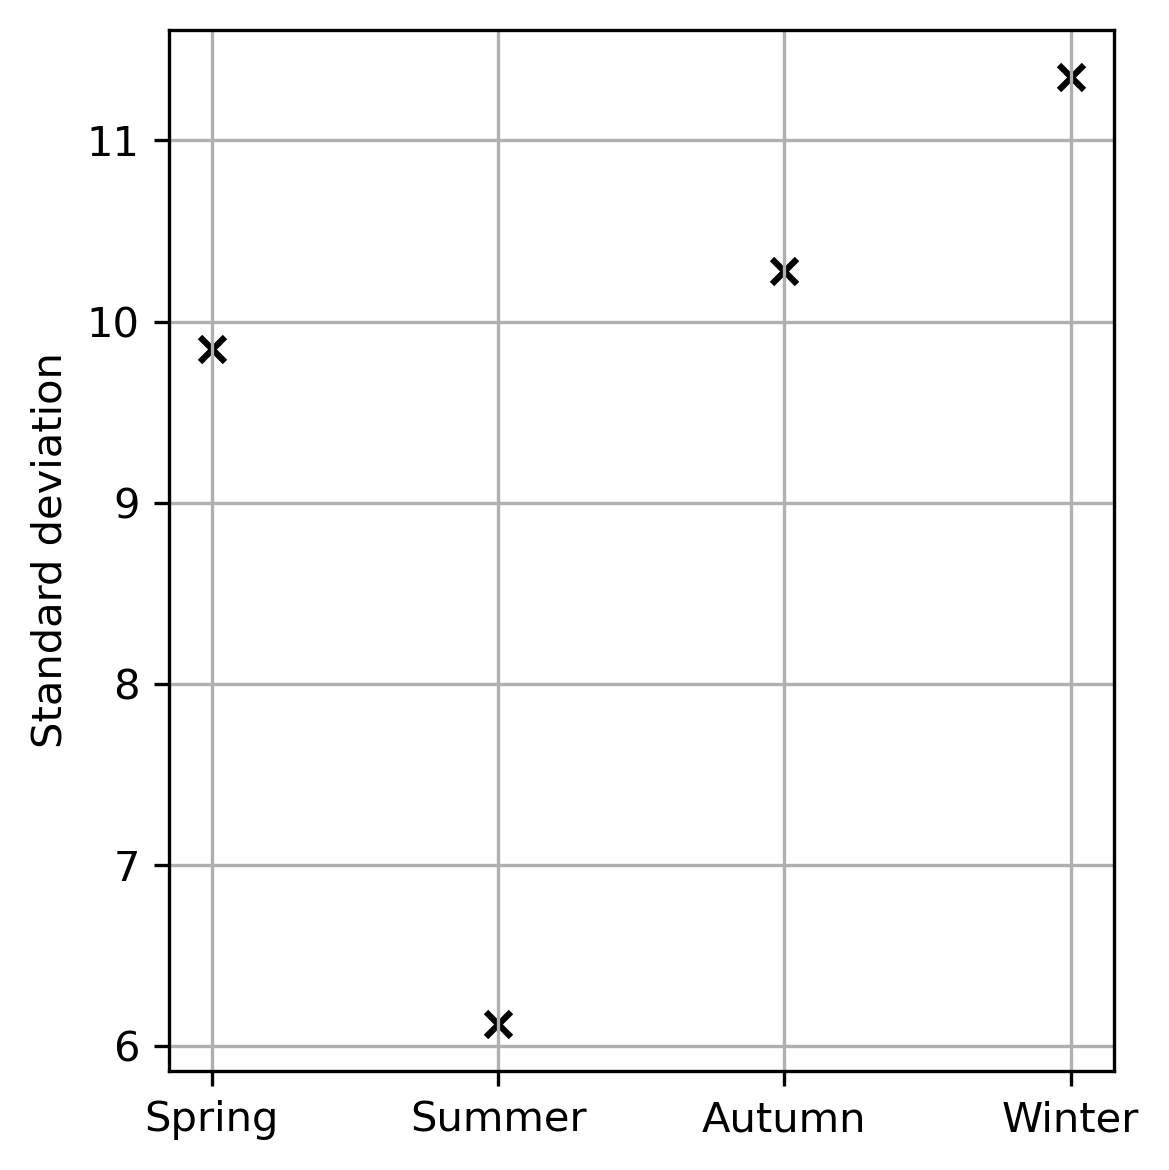

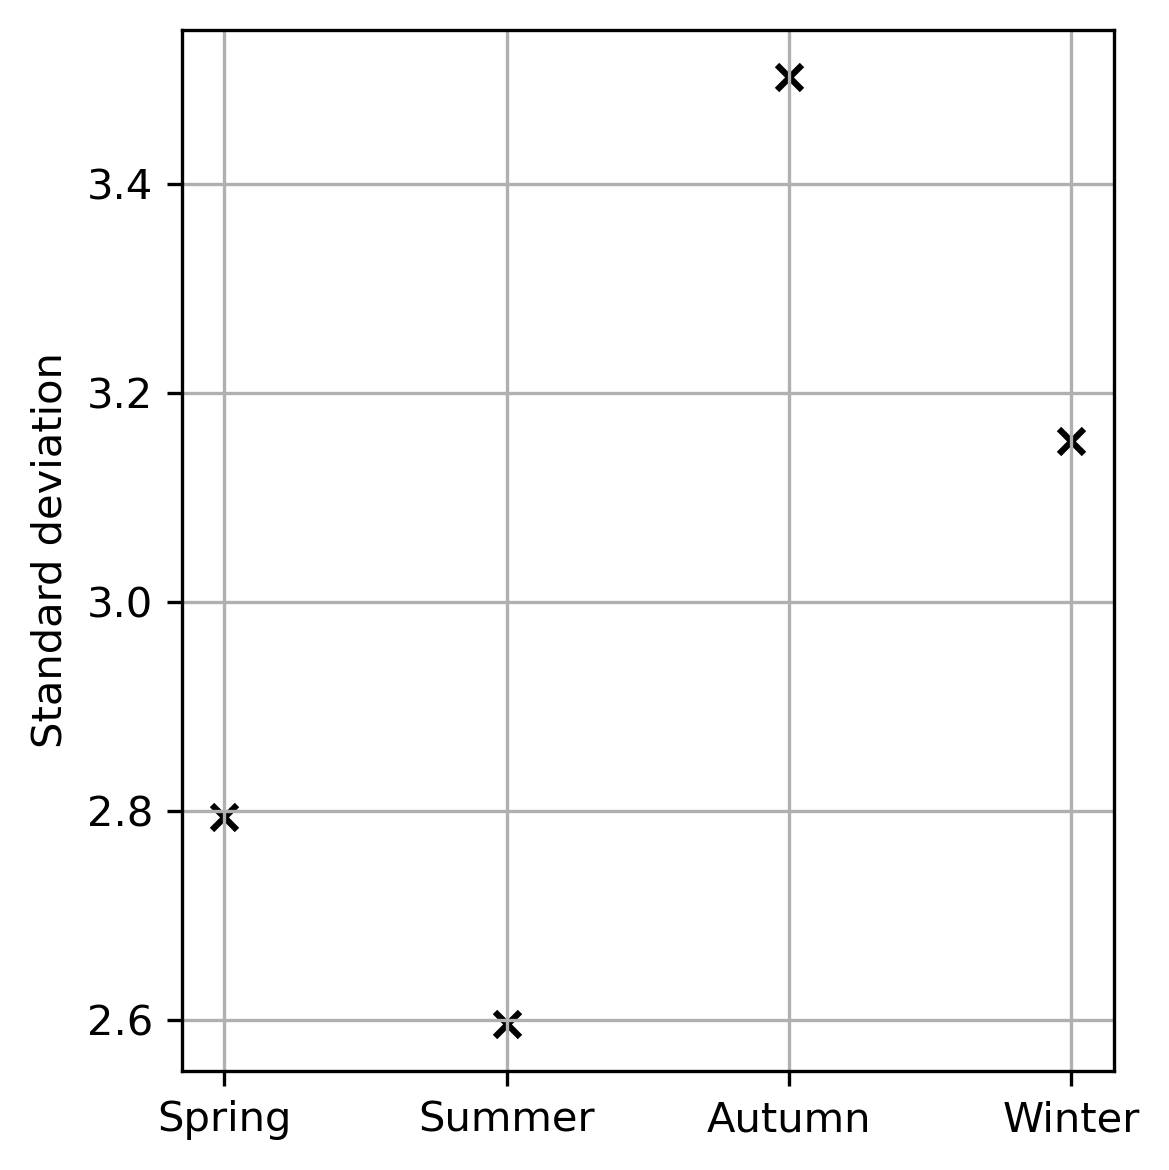

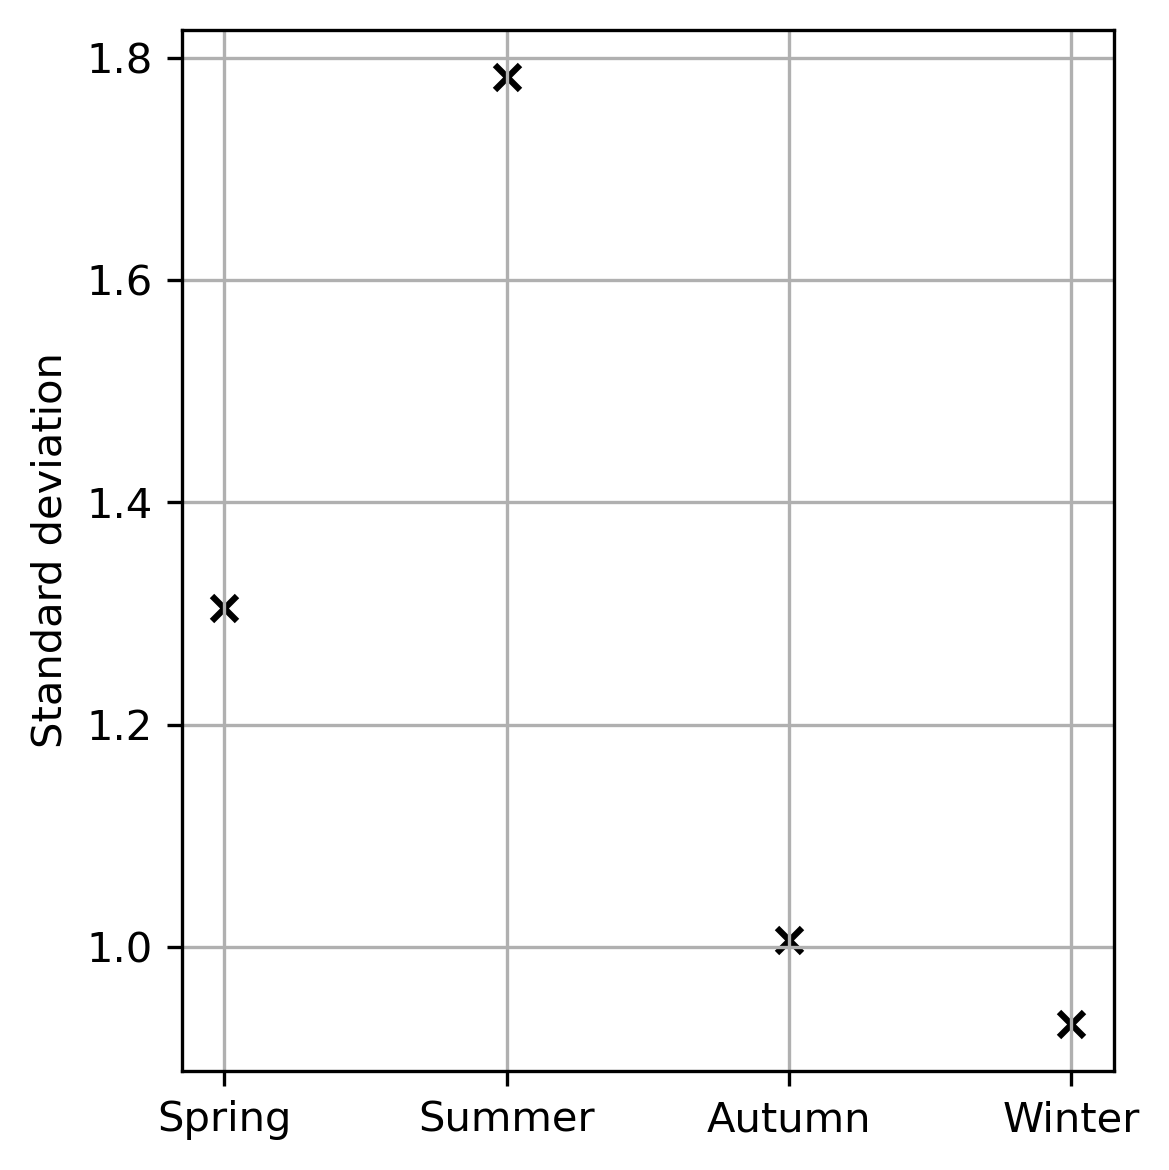

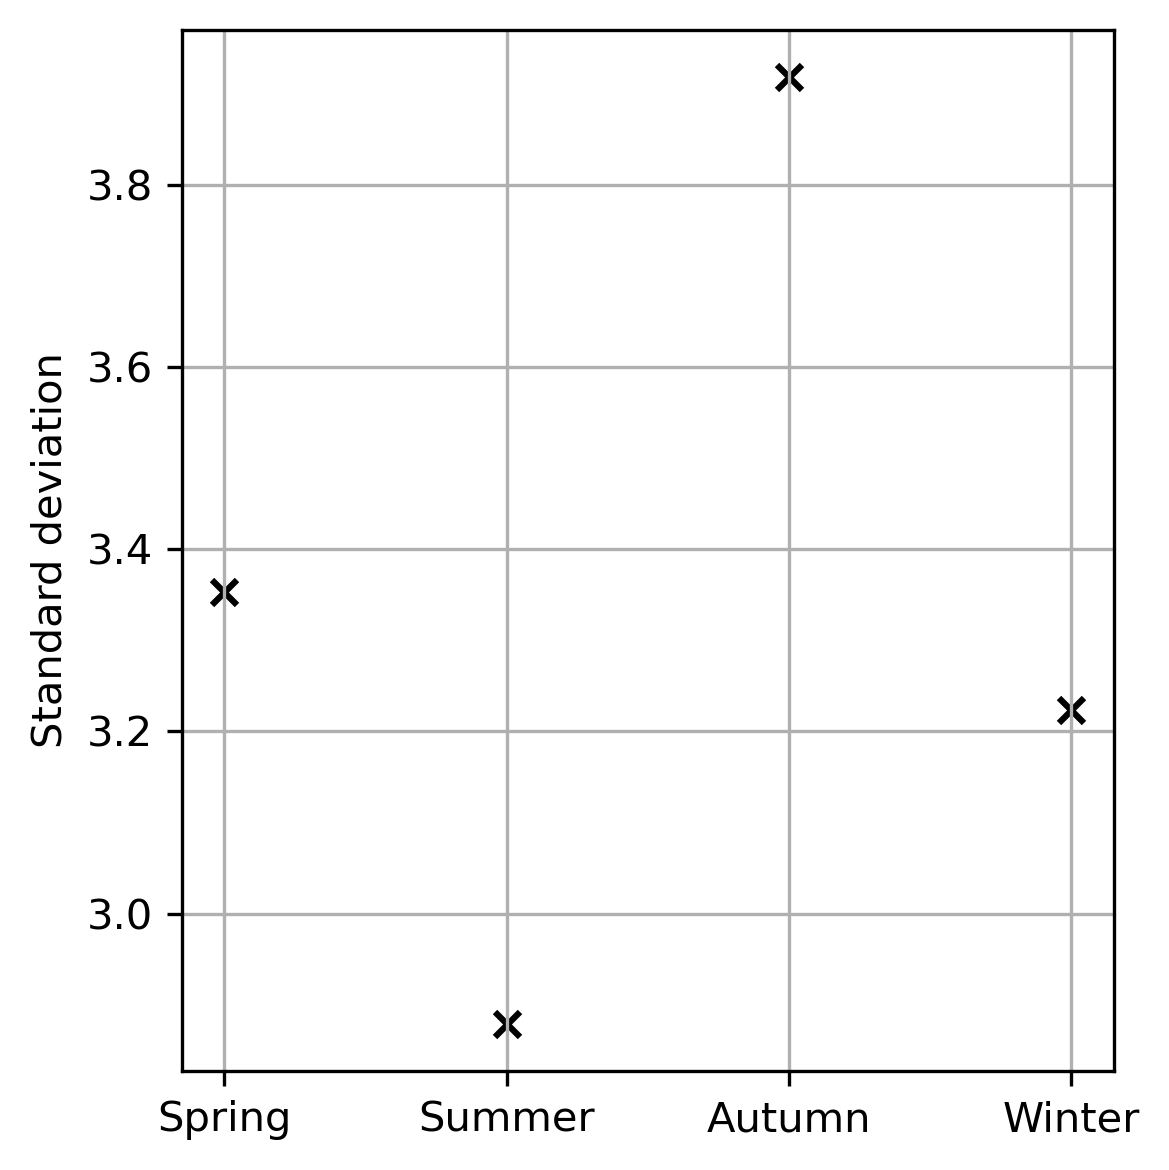

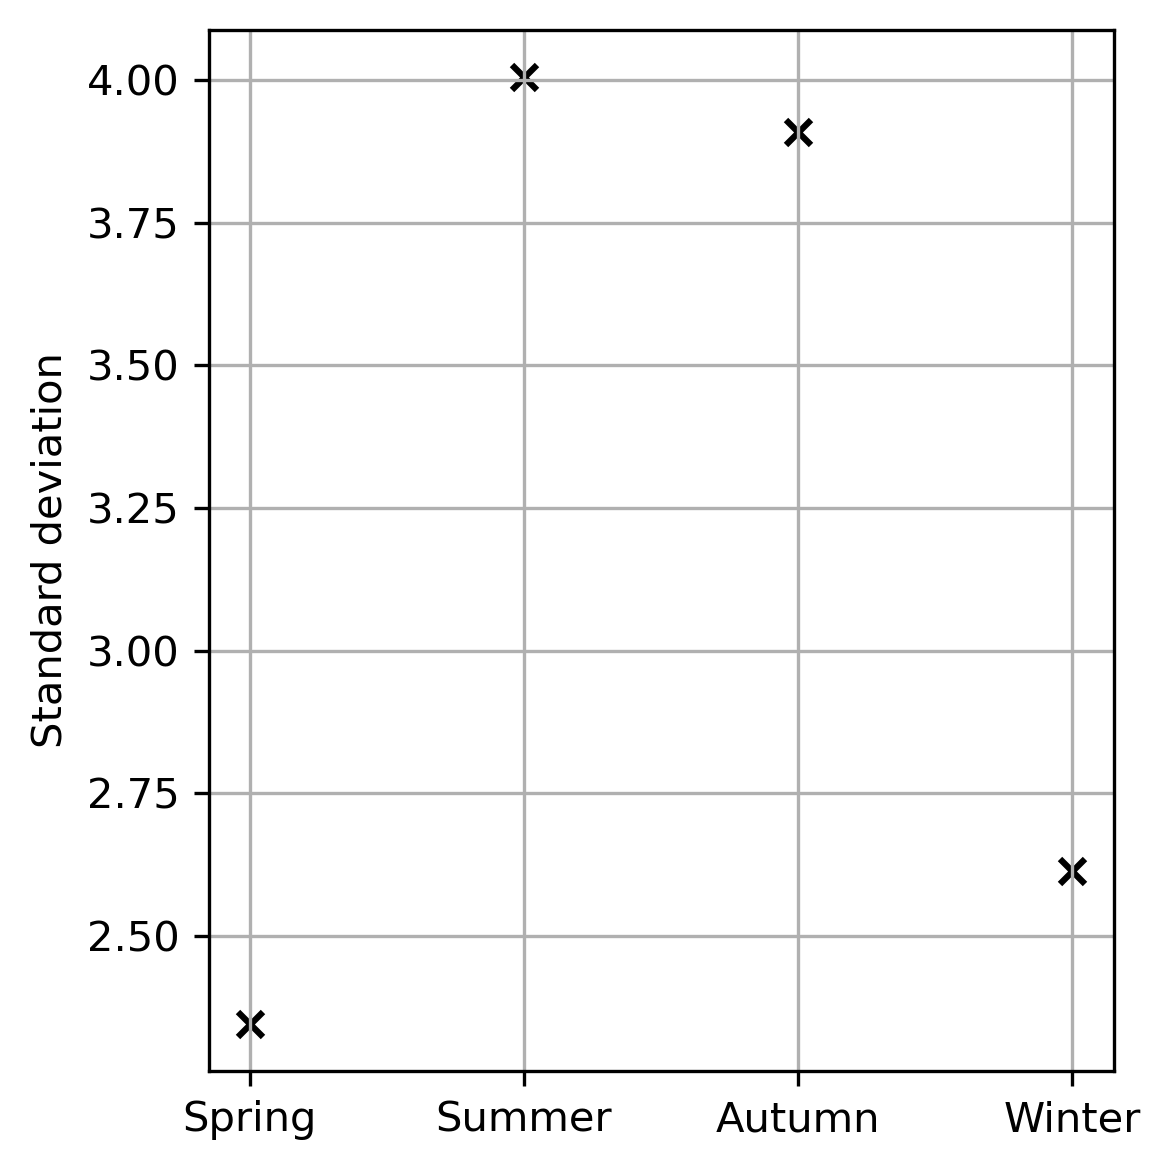

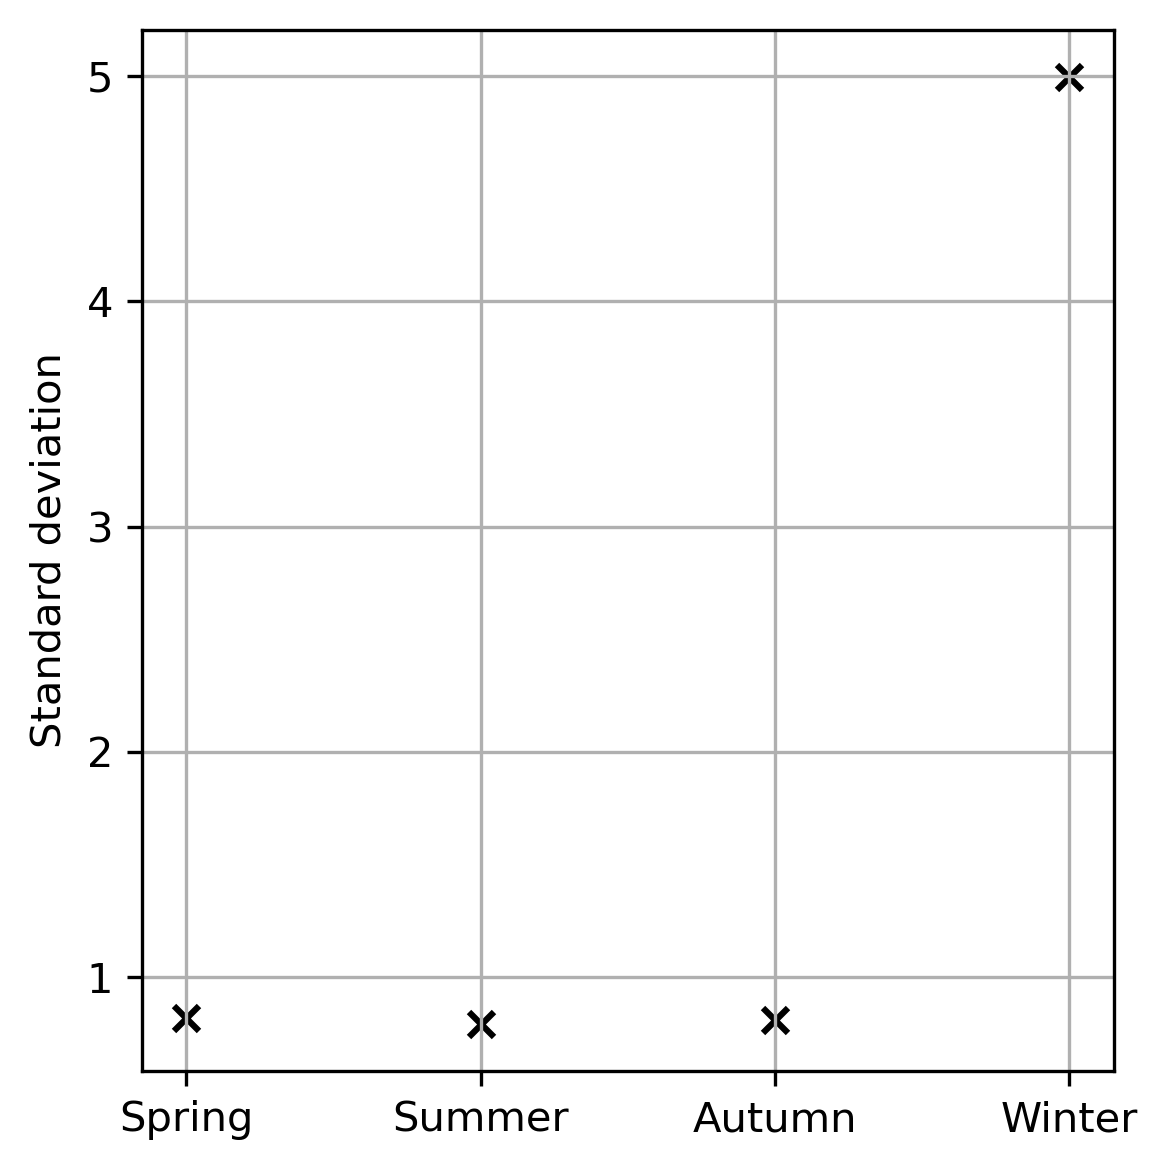

In [18]:
# create std scatter plot for monthly and season variables
df_month_std = df.groupby('Month').std()
df_season_std = df.groupby('Season').std()
print(df_month_std.columns)


# std plot for monthly variables
data_type = 'std'
plot_type = 'scatter'
when = df_month_std.index.name.lower()

for var_name in df_month_std.columns:
    image_name = create_filename(when, var_name.lower(), data_type, plot_type)
    plt.figure(figsize=[6,4], dpi=300)
    plt.scatter(df_month_std.index, df_month_std[var_name], marker='x', c='black')
    plt.xticks(df_month_std.index)
    plt.xlabel('Month')
    plt.ylabel('Standard deviation')
    plt.grid()
    plt.tight_layout()
    plt.savefig(str('./task2-output/task2-images/'+image_name))
    
    
# std plot for seasonal variables
data_type = 'std'
plot_type = 'scatter'
when = df_season_std.index.name.lower()



for var_name in df_season_std.columns:
    image_name = create_filename(when, var_name.lower(), data_type, plot_type)
    plt.figure(figsize=[4,4], dpi=300)
    plt.scatter(season_list, df_season_std[var_name][season_list], marker='x', c='black')
    plt.xticks(df_season_std.index)
    plt.xlabel(None)
    plt.ylabel('Standard deviation')
    plt.grid()
    plt.tight_layout()
    plt.savefig(str('./task2-output/task2-images/'+image_name))

In [12]:
df_month_std

,Barometer,Humidity indoor,Temperature indoor,Temperature outside,Rainfall
Month,,,,,
1,9.825942,2.779340,0.640080,2.894612,2.531768
2,12.848618,2.597058,0.779648,2.856244,1.755249
3,11.363356,2.303421,0.784143,2.192136,1.739282
4,7.881665,2.151984,0.614748,1.582596,0.705976
5,7.924414,3.258940,1.393179,3.065246,3.556726
6,7.415179,1.357821,2.210715,3.755262,3.085889
7,6.119125,1.731719,1.551119,2.370588,5.246837
8,3.384741,0.816497,1.063383,1.772262,2.907123
9,7.962400,1.763291,0.500210,1.617426,2.772492


In [13]:
df_season_std

,Barometer,Humidity indoor,Temperature indoor,Temperature outside,Rainfall,Month
Season,,,,,,
Autumn,10.280671,3.501894,1.006783,3.918078,3.909721,0.811998
Spring,9.850099,2.794434,1.305173,3.353215,2.346647,0.821071
Summer,6.126491,2.597018,1.782268,2.879208,4.004919,0.795198
Winter,11.348714,3.154482,0.931276,3.223018,2.613380,4.992772


In [14]:
df_season_std.index

Index(['Autumn', 'Spring', 'Summer', 'Winter'], dtype='object', name='Season')

In [27]:
df.groupby('Season').describe()['Humidity indoor'][['min', 'max']].loc[season_list]

,min,max
Season,,
Spring,39.0,52.0
Summer,50.0,59.0
Autumn,44.0,59.0
Winter,37.0,50.0


In [24]:
df_season_std

,Barometer,Humidity indoor,Temperature indoor,Temperature outside,Rainfall,Month
Season,,,,,,
Autumn,10.280671,3.501894,1.006783,3.918078,3.909721,0.811998
Spring,9.850099,2.794434,1.305173,3.353215,2.346647,0.821071
Summer,6.126491,2.597018,1.782268,2.879208,4.004919,0.795198
Winter,11.348714,3.154482,0.931276,3.223018,2.613380,4.992772


In [13]:
# seasonal humidity indoor min max plot
df.groupby('Season').describe()

fig = px.line(df.groupby('Season').describe()['Humidity indoor'][['min', 'max']].loc[season_list],
              width=400, height=400)

fig.update_layout(plot_bgcolor='rgba(0, 0, 0, 0)', 
                  paper_bgcolor='rgba(0, 0, 0, 0)')
fig.update_xaxes(title_text=None, # tickmode='linear' shows all the months
                 showline=True, linewidth=1, linecolor='black')
fig.update_yaxes(title_text='Humidity indoor (%)',
#                  range=[16,30],
                showline=True, linewidth=1, linecolor='black')

filename = str(file_path + create_filename('season', 'humidity', 'minmax', 'line'))
print(filename)

fig.show()

./task2-output/task2-images/season-humidity-minmax-line.png


In [14]:
# SEASONAL BAROMETER MINMAX LINE

fig = px.line(df.groupby('Season').describe()['Barometer'][['min', 'max']].loc[season_list],
              width=400, height=400)

fig.update_layout(plot_bgcolor='rgba(0, 0, 0, 0)', 
                  paper_bgcolor='rgba(0, 0, 0, 0)')
fig.update_xaxes(title_text=None, # tickmode='linear' shows all the months
                 showline=True, linewidth=1, linecolor='black')
fig.update_yaxes(title_text='Baro (millibar)',
#                  range=[16,30],
                showline=True, linewidth=1, linecolor='black')

filename = str(file_path + create_filename('season', 'barometer', 'minmax', 'line'))
print(filename)

fig.show()

./task2-output/task2-images/season-barometer-minmax-line.png
